In [1]:
import sys
sys.path.append("..")
from pathlib import Path
import numpy as np
from scipy import stats
import importlib
import src.assay_calibration.fit_utils.two_sample.fit
from src.assay_calibration.fit_utils.fit import Fit
importlib.reload(src.assay_calibration.fit_utils.two_sample.fit)
importlib.reload(src.assay_calibration.fit_utils.fit)
from src.assay_calibration.fit_utils.two_sample.fit import single_fit
from src.assay_calibration.fit_utils.two_sample import (density_utils,constraints, optimize)
import scipy.stats as sps
import matplotlib
matplotlib.set_loglevel("warning")
import matplotlib.pyplot as plt
import numpy as np
from tqdm.auto import trange
import os
sys.path.append(str(Path(os.getcwd()).parent))
from src.assay_calibration.data_utils.dataset import (
    PillarProjectDataframe,
    Scoreset,
    BasicScoreset,
)
import json
import glob

In [2]:
# from src.assay_calibration.data_utils.dataset import (
#     PillarProjectDataframe,
#     Scoreset,
#     BasicScoreset,
# )
# ds = Scoreset.from_json("/data/ross/assay_calibration/scoresets/CALM1_CALM2_CALM3_Weile_2017.json")

In [3]:
# dir(ds)

In [4]:
# ds.scoreset_name

In [5]:
# for sample in ds.samples:
#     print(sample[1])
#     # break

In [6]:
def test_fit(ds, component_range, check_monotonic, init_strategy, bootstrap_seed=None):
    # Load directly from JSON
    fit = Fit(ds)
    fits, best_idx, best_val_ll = fit.run(
                core_limit=1,
                num_fits=10,
                verbose_level=20,
                component_range=component_range,
                bootstrap=True,
                bootstrap_seed=bootstrap_seed,
                verbose=True,
                max_em_iters=10000,
                check_convergence=False,
                check_monotonic=check_monotonic,
                # submerge_steps=None,#256 if check_monotonic else None,
                init_strategy=init_strategy,
                score_min=ds.scores.min() - 1,
                score_max=ds.scores.max() + 1,
                # init_constraint_adjustment_param="random",
                # kmean_init="k-means++"
            )
    
    return fits, ds, best_idx, best_val_ll

# for dataset_f in glob.glob("/data/ross/assay_calibration/scoresets/*.json"):
    
#     dataset_name = dataset_f.split('/')[-1][:-5]

#     for component_range in ("2-component","3-component"):
#         for monotonicity_contraint in ("no constraint","constraint"):
#             # for init_strategy in ("kmeans","random"):
#             init_strategy = "kmeans"
            
#             fits, ds = test_fit(dataset_f, component_range=[3] if component_range[0] == "3" else [2], 
#                                 check_monotonic=False if monotonicity_contraint[0] == "n" else True, 
#                                 init_strategy=init_strategy)
            
#             fit_results = sorted(fits, key=lambda res: res['likelihoods'][-1], reverse=True)
#             best_fit = fit_results[0]
#             scores = ds.scores
#             sample_assignments = ds.sample_assignments
            
#             score_range = np.linspace(scores.min(), scores.max(), 1000)
#             estimatedDensities = np.array([density_utils.joint_densities(score_range[...,None],
#                                                                          best_fit['component_params'],
#                                                                          sample_weights).squeeze() for sample_weights in best_fit['weights']])
            
#             fig,ax = plt.subplots(3,1, figsize=(12,12))
#             for i in range(3):
#                 ax[i].plot(score_range, estimatedDensities[i].sum(0), label='Estimated', color='C1', linestyle='--')
#                 ax[i].hist(scores[sample_assignments[:,i]], density=True, alpha=0.3, color='gray', label='Data histogram')
#                 ax[i].set_title(f'Sample {i+1}')
#                 ax[i].legend()

In [7]:
all_results = {}

Processing BRCA1_Findlay_2018
BRCA1_Findlay_2018: 3893 total variants
	Pathogenic/Likely Pathogenic: 410 variants
	Benign/Likely Benign: 270 variants
	gnomAD: 599 variants
	Synonymous: 544 variants

3-component constraint bootstrap 0/3000 start...sample counts: [410 270 599 544]
sample counts: [363 212 502 544]
sample counts: [363 212 502 544]
Running 10 fits for each of 1 components sequentially
MoM fixing initial constraint
param_to_adjust skew


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

KM fixing initial constraint
param_to_adjust skew
KM fixing initial constraint
param_to_adjust skew
KM fixing initial constraint
param_to_adjust skew
KM fixing initial constraint
param_to_adjust skew
KM fixing initial constraint
param_to_adjust skew
KM fixing initial constraint
param_to_adjust skew


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MoM fixing initial constraint
param_to_adjust skew


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

KM fixing initial constraint
param_to_adjust skew


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

KM fixing initial constraint
param_to_adjust skew
KM fixing initial constraint
param_to_adjust skew
KM fixing initial constraint
param_to_adjust skew


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MoM fixing initial constraint
param_to_adjust skew


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MoM fixing initial constraint
param_to_adjust skew


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MoM fixing initial constraint
param_to_adjust skew


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

MoM fixing initial constraint
param_to_adjust skew
MoM fixing initial constraint
param_to_adjust skew


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

KM fixing initial constraint
param_to_adjust skew


EM Iteration:   0%|          | 0/10000 [00:00<?, ?it/s]

 val_ll: -0.6174113973353699
BRCA1_Findlay_2018 3-component constraint []


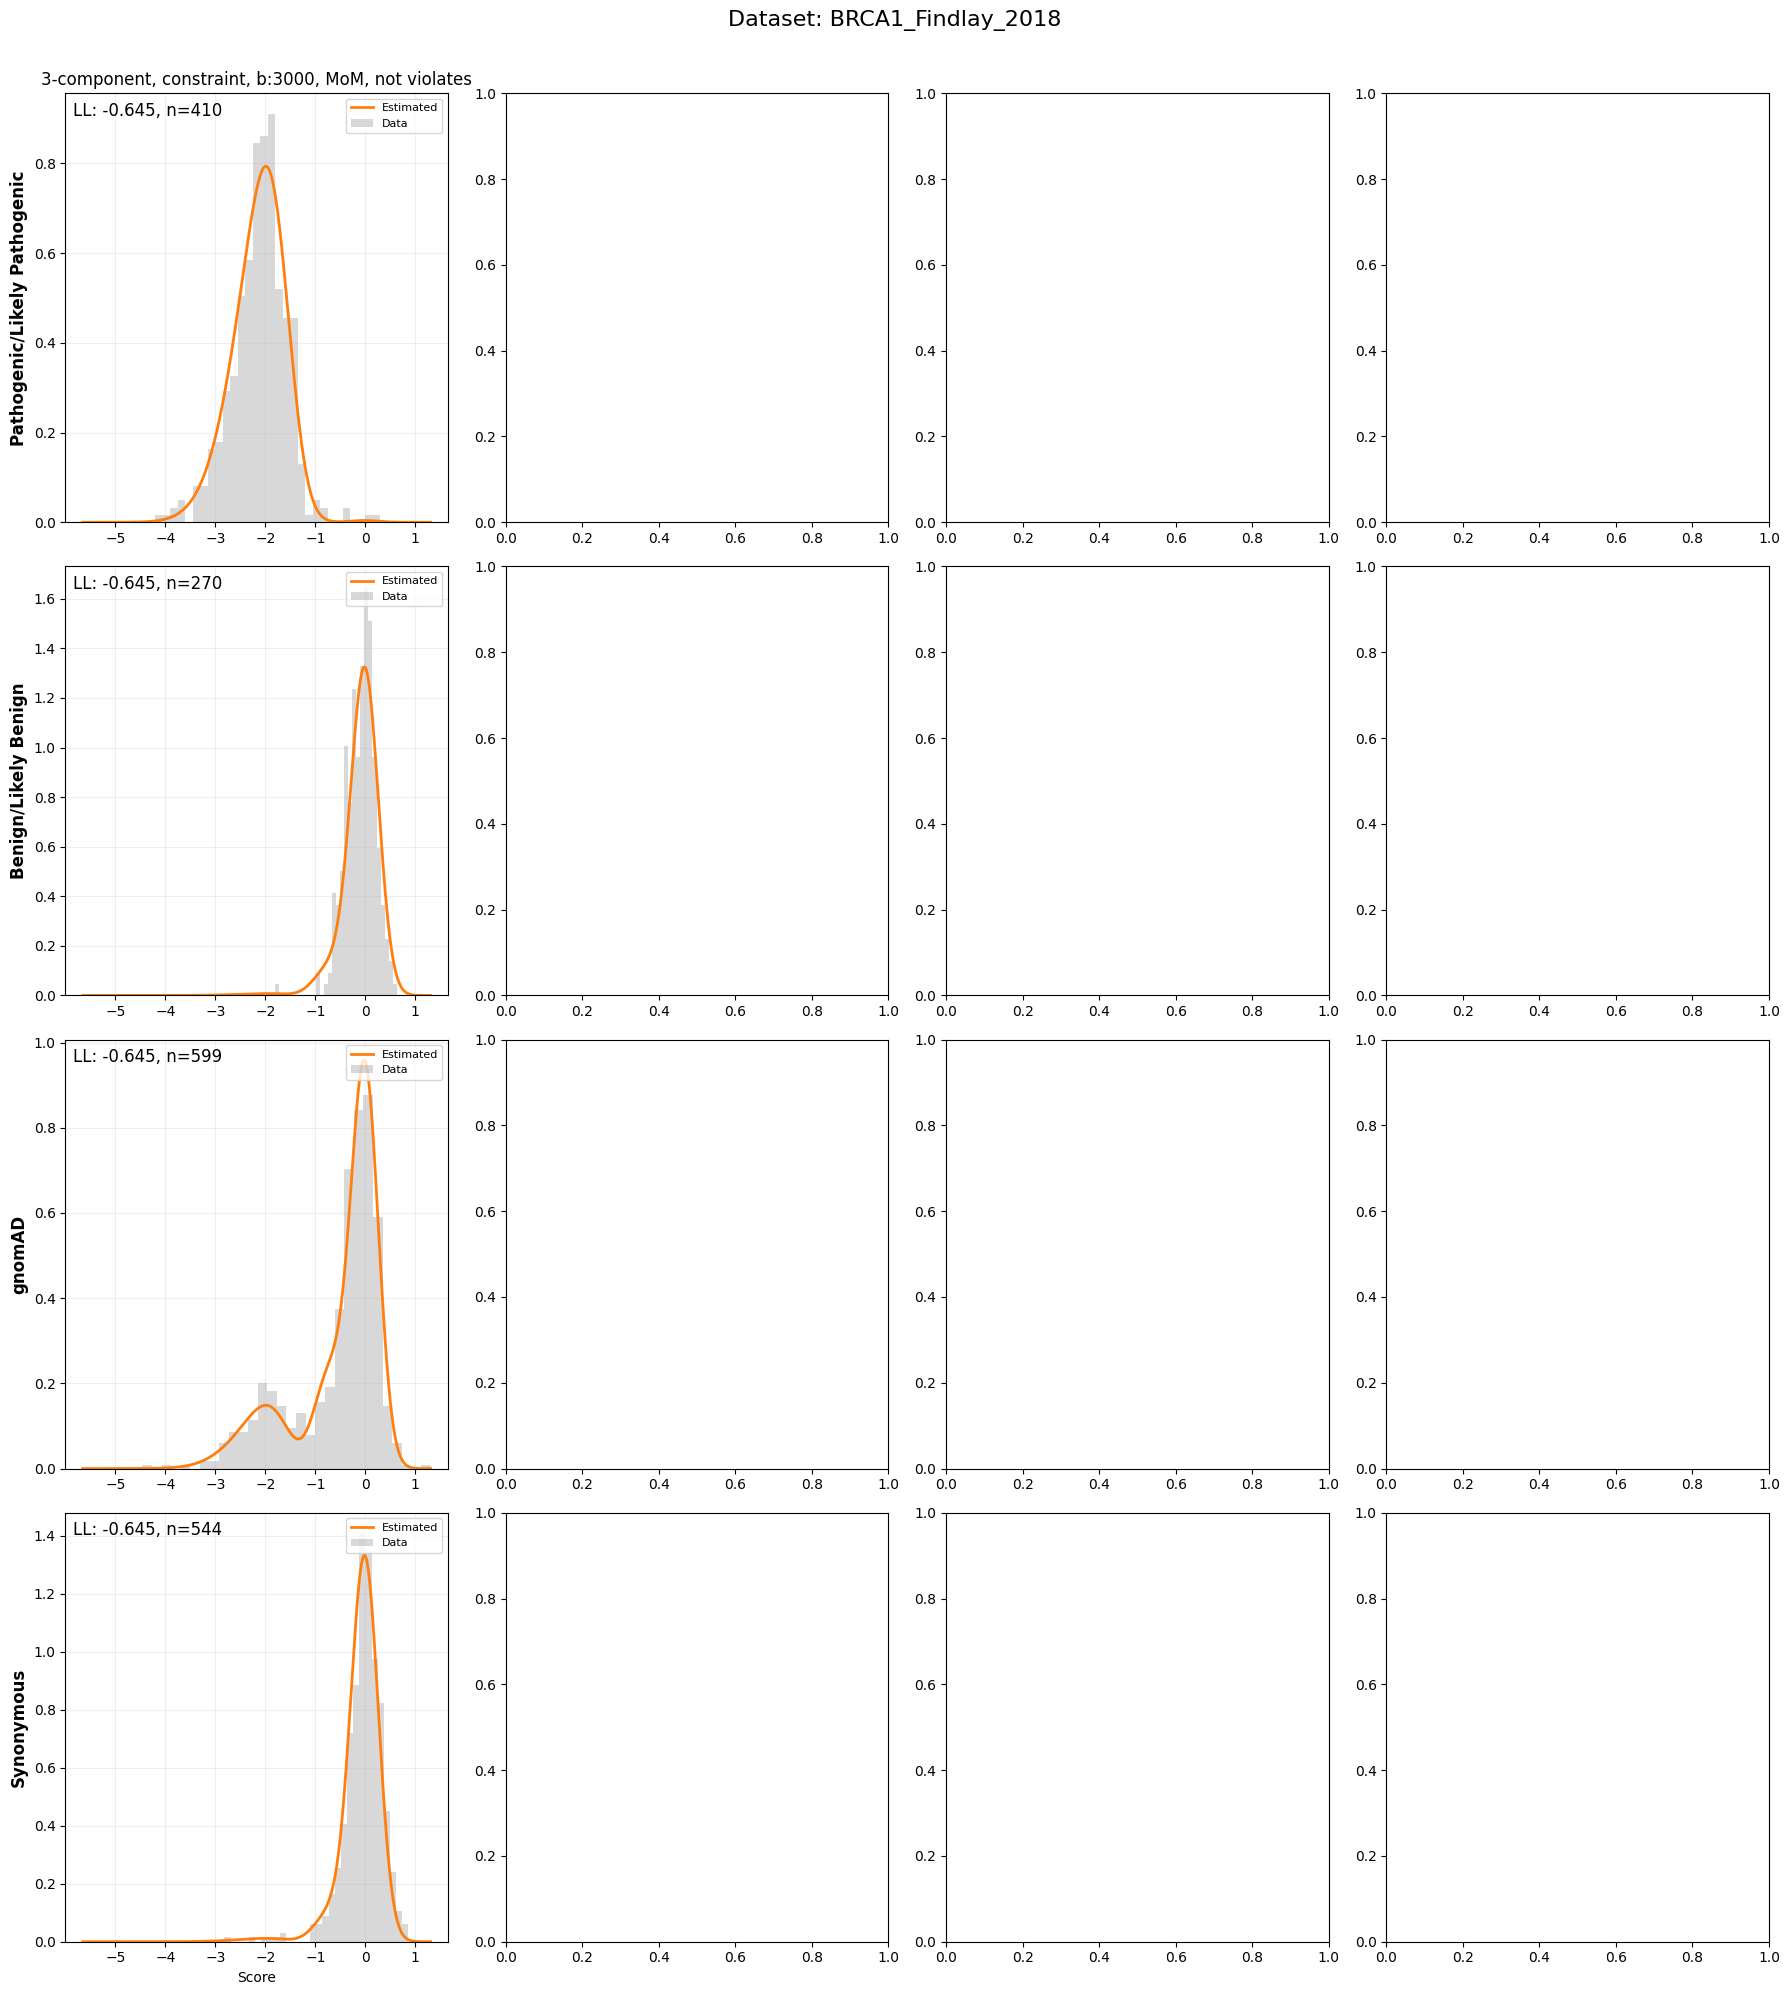

In [10]:
#### import matplotlib.pyplot as plt
import glob
import os
import numpy as np

# Create output directory if it doesn't exist
output_dir = "/data/ross/assay_calibration/test_experimental_plots_v9"
os.makedirs(output_dir, exist_ok=True)

N_BOOTSTRAPS = 3000

# Suppress matplotlib debug messages
import logging
logging.getLogger('matplotlib').setLevel(logging.WARNING)

n_non_violating_fits_without_constraint = 0

for dataset_f in (
    glob.glob("/data/ross/assay_calibration/scoresets/BRCA1*Findlay*.json")
):
    
    dataset_name = dataset_f.split('/')[-1][:-5]
    print(f"Processing {dataset_name}")

    ds = Scoreset.from_json(dataset_f)
    print(ds)

    sample_names = np.array([sample[1] for sample in ds.samples])
    
    # Create figure with 4x3 subplot grid
    fig, axes = plt.subplots(len(sample_names), 4, figsize=(18, 5*len(sample_names)))
    fig.suptitle(f'Dataset: {dataset_name}', fontsize=16, y=0.995)

    all_results[dataset_name] = {}
    
    plot_idx = 0
    for component_range in ["3-component"]:#["2-component", "3-component"]:
        for monotonicity_constraint in ["constraint"]:#["constraint", "no constraint"]:
            # for init_density_fix in ["lambda","sigma"]:
            init_strategy = "random"

            # for N_BOOTSTRAPS in [100,1000,5000]:

            all_results[dataset_name][(component_range, monotonicity_constraint)] = []
    
            for bootstrap_iter in range(1):
                print(f'{component_range} {monotonicity_constraint} bootstrap {bootstrap_iter}/{N_BOOTSTRAPS} start...',end='')
                
                try:
                    # Run the fit
                    fits, ds, best_idx, best_val_ll = test_fit(
                        ds, 
                        component_range=[3] if component_range[0] == "3" else [2], 
                        check_monotonic=False if monotonicity_constraint[0] == "n" else True, 
                        init_strategy=init_strategy,
                        bootstrap_seed=bootstrap_iter
                    )

                    print(f' val_ll: {best_val_ll}')
                    
                    # Get best fit
                    fit_results = sorted(fits, key=lambda res: res['likelihoods'][-1], reverse=True)
                    times_submerged = [results['times_submerged'] for results in fit_results if len(results['times_submerged']) != 0]
                    print(dataset_name, component_range, monotonicity_constraint, times_submerged)
                    # best_fit = fit_results[0]
                    best_fit = fit_results[best_idx]
                    best_init = "MoM" if best_fit['kmeans'] == "method_of_moments" else "KM"
                    xlims = best_fit['xlims']
                    scores = ds.scores
                    sample_assignments = ds.sample_assignments
        
                    
                    all_results[dataset_name][(component_range, monotonicity_constraint)].append({'fit': best_fit, 
                                                                                             'times_submerged': times_submerged,
                                                                                             'best_val_ll': best_val_ll}) 
        
                    # Calculate densities
                    score_range = np.linspace(scores.min(), scores.max(), 1000)
                    estimatedDensities = np.array([
                        density_utils.joint_densities(
                            score_range[..., None],
                            best_fit['component_params'],
                            sample_weights
                        ).squeeze() for sample_weights in best_fit['weights']
                    ])
                    
                    # Check if density constraint violated
                    fit_violates_constraint = constraints.multicomponent_density_constraint_violated(best_fit['component_params'], xlims)
                    if monotonicity_constraint == "no constraint" and fit_violates_constraint:
                        n_non_violating_fits_without_constraint += 1
                    fit_violates_constraint = "violates" if fit_violates_constraint else "not violates"
                    
                    # Plot for each sample (3 columns)
                    for i in range(len(estimatedDensities)):
                        ax = axes[i, plot_idx]
                        
                        # Plot estimated density
                        ax.plot(score_range, estimatedDensities[i].sum(0), 
                               label='Estimated', color='C1', linestyle='-', linewidth=2)
                        
                        # Plot histogram of actual data
                        if i < sample_assignments.shape[1] and sample_assignments[:, i].sum() > 0:
                            ax.hist(scores[sample_assignments[:, i]], 
                                   bins=30, density=True, alpha=0.3, 
                                   color='gray', label='Data')
                        
                        # Set labels and title
                        if plot_idx == 0:
                            ax.set_ylabel(sample_names[i], 
                                         fontsize=12, fontweight='bold')
                        
                        if i == 0:
                            ax.set_title(f'{component_range}, {monotonicity_constraint}, b:{N_BOOTSTRAPS}, {best_init}, {fit_violates_constraint}', fontsize=12)
                        
                        if i == len(estimatedDensities) - 1:
                            ax.set_xlabel('Score', fontsize=10)
                        
                        ax.legend(loc='upper right', fontsize=8)
                        ax.grid(True, alpha=0.2)
                        
                        # Add likelihood value as text
                        likelihood = best_fit['likelihoods'][-1]
                        ax.text(0.02, 0.98, f'LL: {likelihood:.3f}, n={len(scores[sample_assignments[:, i]])}', 
                               transform=ax.transAxes, fontsize=12,
                               verticalalignment='top')
                    
                except Exception as e:
                    print(f"  Error with {component_range}, {monotonicity_constraint} bootstrap {bootstrap_iter}/{N_BOOTSTRAPS}: {e}")
                    # Create empty plots with error message
                    for i in range(len(estimatedDensities)):
                        ax = axes[i, plot_idx]
                        ax.text(0.5, 0.5, f'Error:\n{str(e)[:30]}...', 
                               ha='center', va='center', transform=ax.transAxes)
                        ax.set_xticks([])
                        ax.set_yticks([])
    
                        if i == 0:
                            ax.set_title(f'{component_range}, {monotonicity_constraint}, b:{N_BOOTSTRAPS}, {best_init}, {fit_violates_constraint}', fontsize=12)
                        
                        if plot_idx == 0:
                            ax.set_ylabel(sample_names[i], 
                                         fontsize=12, fontweight='bold')
                        
                        if i == len(estimatedDensities) - 1:
                            ax.set_xlabel('Score', fontsize=10)
            
            plot_idx += 1
    
    # Adjust layout and save
    plt.tight_layout(rect=[0, 0, 1, 0.99])
    
    # output_path = f"{output_dir}/{dataset_name}.png"
    # plt.savefig(output_path, dpi=100, bbox_inches='tight')
    # plt.close()
    
    # print(f"  Saved to {output_path}")

# print("All plots saved!")

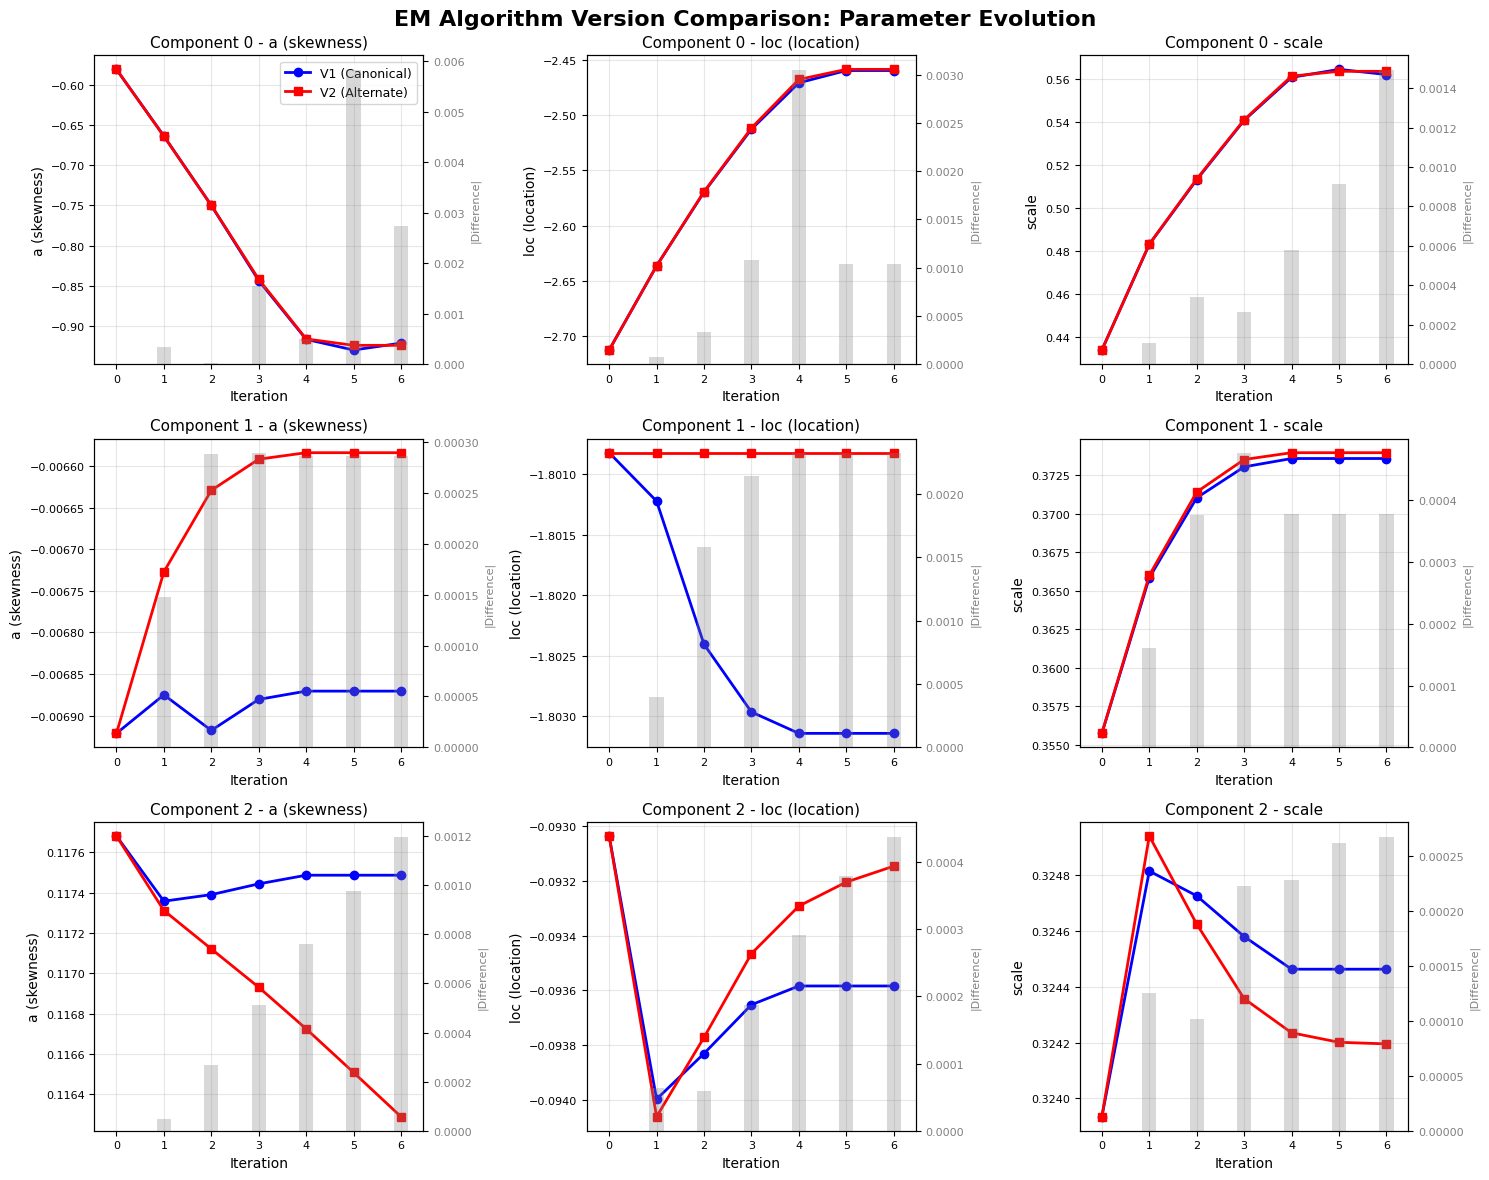

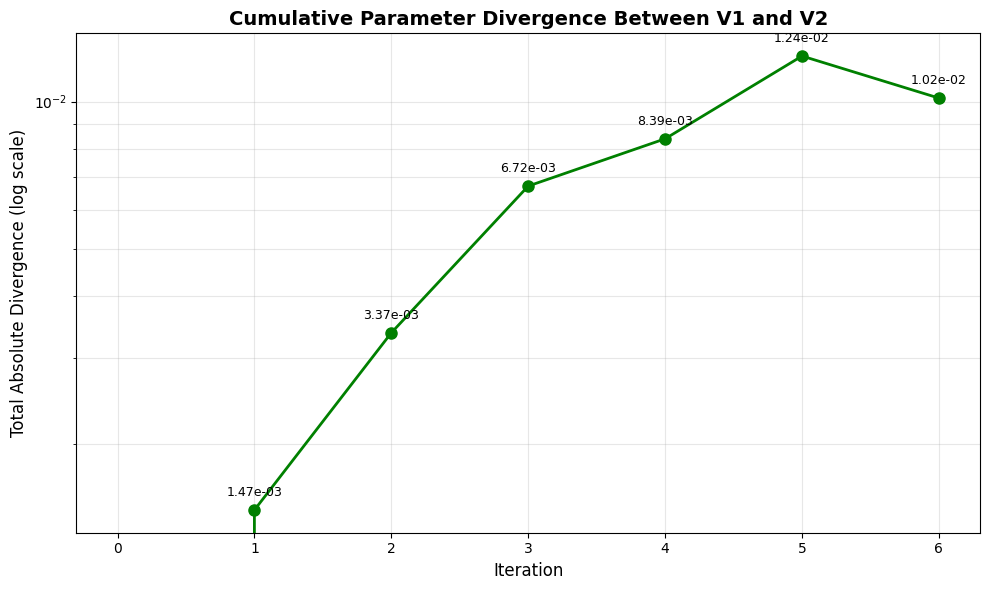


Numerical Divergence Summary:

Iteration 0:
  Max parameter difference: 0.000000e+00
  Total divergence: 0.000000e+00

Iteration 1:
  Max parameter difference: 4.004004e-04
  Total divergence: 1.465337e-03

Iteration 2:
  Max parameter difference: 1.582927e-03
  Total divergence: 3.371141e-03

Iteration 3:
  Max parameter difference: 2.142206e-03
  Total divergence: 6.721146e-03

Iteration 4:
  Max parameter difference: 3.047255e-03
  Total divergence: 8.393761e-03

Iteration 5:
  Max parameter difference: 5.827836e-03
  Total divergence: 1.238666e-02

Iteration 6:
  Max parameter difference: 2.743882e-03
  Total divergence: 1.016395e-02


In [14]:
import matplotlib.pyplot as plt
import numpy as np
import re

# Parse the text data
text = """iteration 0 v1 end. old version updated params: [(-0.5805418707243704, -2.7124641210464744, 0.43397992477942743), (-0.00692127005621072, -1.8008227604222093, 0.35575293935409197), (0.11768131423730091, -0.09303597260309016, 0.32393479574131306)]
iteration 0 v2 end. new version updated params: [(-0.5805418707243704, -2.7124641210464744, 0.43397992477942743), (-0.00692127005621072, -1.8008227604222093, 0.35575293935409197), (0.11768131423730091, -0.09303597260309016, 0.32393479574131306)]
iteration 1 v1 end. old version updated params: [(-0.6634852085993681, -2.636401998128788, 0.48312639016856146), (-0.0068750168684069335, -1.801223160789823, 0.365853539008745), (0.11735803818532357, -0.0939971646222735, 0.32481493868388756)]
iteration 1 v2 end. new version updated params: [(-0.6638251852016432, -2.6363276461030294, 0.483232967118522), (-0.006727226071011903, -1.8008227604301645, 0.366013997594136), (0.11731186196814218, -0.09406124408926421, 0.324940464439075)]
iteration 2 v1 end. old version updated params: [(-0.7498828919823498, -2.569673057562927, 0.5131792138986744), (-0.006917737508398759, -1.802405687786071, 0.3710427202450931), (0.11739059082172754, -0.09383044466621387, 0.32472609074159847)]
iteration 2 v2 end. new version updated params: [(-0.7498598073858781, -2.5693422195187146, 0.5135195179435516), (-0.00662932958831702, -1.80082276043607, 0.3714187482255752), (0.11712116597011417, -0.0937716152708355, 0.3246247938632102)]
iteration 3 v1 end. old version updated params: [(-0.8434395502576391, -2.5127864057071205, 0.5407942501905997), (-0.0068804897505533175, -1.8029649662434526, 0.37305127636904994), (0.11744405154877682, -0.09365220235229807, 0.3245802846325428)]
iteration 3 v2 end. new version updated params: [(-0.8418895183424414, -2.5117110495483406, 0.5410609827420266), (-0.006591909309018644, -1.8008227604454927, 0.3735270880601877), (0.11693099122445351, -0.093465489153844, 0.3243576305707866)]
iteration 4 v1 end. old version updated params: [(-0.9166183967104758, -2.4708744158886686, 0.5607751812411784), (-0.0068705355986378395, -1.8031415024599942, 0.373591734003304), (0.1174869740812706, -0.09358374842379076, 0.3244633165573536)]
iteration 4 v2 end. new version updated params: [(-0.9161156134050459, -2.46782716100853, 0.5613539024007691), (-0.006584109515229817, -1.8008227604454927, 0.3739695636503679), (0.11672474977513311, -0.09329183086224885, 0.32423545468671483)]
iteration 5 v1 end. old version updated params: [(-0.9299239626036667, -2.459749721931509, 0.5645063638081154), (-0.0068705355986378395, -1.8031415024599942, 0.373591734003304), (0.11748697408127061, -0.09358374842379076, 0.3244633165573536)]
iteration 5 v2 end. new version updated params: [(-0.9240961270524808, -2.4587085891665628, 0.5635918851871664), (-0.006584109517046532, -1.8008227604531564, 0.37396956365037237), (0.11650829232350718, -0.09320415524786263, 0.32420138039314095)]
iteration 6 v1 end. old version updated params: [(-0.9213522448941158, -2.459749721931509, 0.5620993298951621), (-0.0068705355986378395, -1.8031415024599942, 0.373591734003304), (0.11748697408127061, -0.09358374842379076, 0.3244633165573536)]
iteration 6 v2 end. new version updated params: [(-0.9240961270366699, -2.4587085891665628, 0.5635918851827248), (-0.006584109517046532, -1.8008227604531564, 0.37396956365037237), (0.11628891905754568, -0.09314605548760457, 0.3241956821085593)]"""

# Function to extract parameters from text
def extract_params(line):
    # Find all numbers in brackets
    match = re.search(r'\[(.*?)\]', line)
    if match:
        params_str = match.group(1)
        # Extract all tuples
        tuples = re.findall(r'\(([-\d.e]+),\s*([-\d.e]+),\s*([-\d.e]+)\)', params_str)
        return [[float(x), float(y), float(z)] for x, y, z in tuples]
    return None

# Parse the data
v1_params = []
v2_params = []
iterations = []

for line in text.split('\n'):
    if 'end' in line and 'updated params:' in line:
        params = extract_params(line)
        if params:
            if 'v1' in line:
                v1_params.append(params)
                if 'iteration' in line:
                    iter_num = int(re.search(r'iteration (\d+)', line).group(1))
                    if iter_num not in iterations:
                        iterations.append(iter_num)
            elif 'v2' in line:
                v2_params.append(params)

# Create visualization
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('EM Algorithm Version Comparison: Parameter Evolution', fontsize=16, fontweight='bold')

param_names = ['a (skewness)', 'loc (location)', 'scale']
component_names = ['Component 0', 'Component 1', 'Component 2']

for comp_idx in range(3):
    for param_idx in range(3):
        ax = axes[comp_idx, param_idx]
        
        # Extract parameter values for this component and parameter
        v1_values = [params[comp_idx][param_idx] for params in v1_params if comp_idx < len(params)]
        v2_values = [params[comp_idx][param_idx] for params in v2_params if comp_idx < len(params)]
        
        # Plot
        iters = range(len(v1_values))
        ax.plot(iters, v1_values, 'b-o', label='V1 (Canonical)', markersize=6, linewidth=2)
        ax.plot(iters, v2_values, 'r-s', label='V2 (Alternate)', markersize=6, linewidth=2)
        
        # Calculate divergence
        if len(v1_values) == len(v2_values):
            divergence = [abs(v1 - v2) for v1, v2 in zip(v1_values, v2_values)]
            
            # Add divergence on secondary axis
            ax2 = ax.twinx()
            ax2.bar(iters, divergence, alpha=0.3, color='gray', width=0.3)
            ax2.set_ylabel('|Difference|', fontsize=8, color='gray')
            ax2.tick_params(axis='y', labelcolor='gray', labelsize=8)
        
        ax.set_xlabel('Iteration', fontsize=10)
        ax.set_ylabel(f'{param_names[param_idx]}', fontsize=10)
        ax.set_title(f'{component_names[comp_idx]} - {param_names[param_idx]}', fontsize=11)
        ax.grid(True, alpha=0.3)
        ax.tick_params(labelsize=8)
        
        if comp_idx == 0 and param_idx == 0:
            ax.legend(fontsize=9)

plt.tight_layout()
plt.show()

# Create summary divergence plot
fig2, ax = plt.subplots(1, 1, figsize=(10, 6))

# Calculate total divergence per iteration
total_divergence = []
for i in range(len(v1_params)):
    div = 0
    for comp_idx in range(3):
        for param_idx in range(3):
            if comp_idx < len(v1_params[i]) and comp_idx < len(v2_params[i]):
                div += abs(v1_params[i][comp_idx][param_idx] - v2_params[i][comp_idx][param_idx])
    total_divergence.append(div)

ax.semilogy(range(len(total_divergence)), total_divergence, 'go-', linewidth=2, markersize=8)
ax.set_xlabel('Iteration', fontsize=12)
ax.set_ylabel('Total Absolute Divergence (log scale)', fontsize=12)
ax.set_title('Cumulative Parameter Divergence Between V1 and V2', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, which='both')

# Add annotations
for i, val in enumerate(total_divergence):
    ax.annotate(f'{val:.2e}', (i, val), textcoords="offset points", xytext=(0,10), ha='center', fontsize=9)

plt.tight_layout()
plt.show()

# Print numerical summary
print("\nNumerical Divergence Summary:")
print("="*50)
for i in range(len(v1_params)):
    print(f"\nIteration {i}:")
    max_diff = 0
    for comp_idx in range(3):
        for param_idx in range(3):
            if comp_idx < len(v1_params[i]) and comp_idx < len(v2_params[i]):
                diff = abs(v1_params[i][comp_idx][param_idx] - v2_params[i][comp_idx][param_idx])
                max_diff = max(max_diff, diff)
    print(f"  Max parameter difference: {max_diff:.6e}")
    print(f"  Total divergence: {total_divergence[i]:.6e}")

In [ ]:
for dataset in all_results:
    for key in all_results[dataset]:
        print(dataset, key, all_results[dataset][key]['times_submerged'])

In [12]:
# for dataset_f in glob.glob("/data/ross/assay_calibration/scoresets/KCNH2_O_Neill_2024_surface_expression*.json"):
#     dataset_name = dataset_f.split('/')[-1][:-5]
#     print(f"Processing {dataset_name}")

#     ds = Scoreset.from_json(dataset_f)
#     print(ds)

#     sample_names = np.array([sample[1] for sample in ds.samples])
    
#     # Create figure with 4x3 subplot grid
#     fig, axes = plt.subplots(len(sample_names), 4, figsize=(18, 5*len(sample_names)))
#     fig.suptitle(f'Dataset: {dataset_name}', fontsize=16, y=0.995)
    
#     for i,component_range in enumerate(["2-component", "3-component"]):
#         for monotonicity_constraint in ["constraint", "no constraint"]:
#             if (component_range,monotonicity_constraint) not in all_results[dataset_name]:
#                 continue
#             best_fit = all_results[dataset_name][(component_range,monotonicity_constraint)]
        
#             best_init = "MoM" if best_fit['kmeans'] == "method_of_moments" else "KM"
#             xlims = best_fit['xlims']
#             scores = ds.scores
#             sample_assignments = ds.sample_assignments


#             # Calculate densities
#             score_range = np.linspace(scores.min(), scores.max(), 1000)
#             estimatedDensities = np.array([
#                 density_utils.joint_densities(
#                     score_range[..., None],
#                     best_fit['component_params'],
#                     sample_weights
#                 ).squeeze() for sample_weights in best_fit['weights']
#             ])
            
#             # Check if density constraint violated
#             fit_violates_constraint = constraints.multicomponent_density_constraint_violated(best_fit['component_params'], xlims)
#             if monotonicity_constraint == "no constraint" and fit_violates_constraint:
#                 n_non_violating_fits_without_constraint += 1
#             fit_violates_constraint = "violates" if fit_violates_constraint else "not violates"
            
#             # Plot for each sample (3 columns)
#             for i in range(len(estimatedDensities)):
#                 ax = axes[i, plot_idx]
                
#                 # Plot estimated density
#                 ax.plot(score_range, estimatedDensities[i].sum(0), 
#                        label='Estimated', color='C1', linestyle='-', linewidth=2)
                
#                 # Plot histogram of actual data
#                 if i < sample_assignments.shape[1] and sample_assignments[:, i].sum() > 0:
#                     ax.hist(scores[sample_assignments[:, i]], 
#                            bins=30, density=True, alpha=0.3, 
#                            color='gray', label='Data')
                
#                 # Set labels and title
#                 if plot_idx == 0:
#                     ax.set_ylabel(sample_names[i], 
#                                  fontsize=12, fontweight='bold')
                
#                 if i == 0:
#                     ax.set_title(f'{component_range}, {monotonicity_constraint}, {best_init}, {fit_violates_constraint}', fontsize=12)
                
#                 if i == len(estimatedDensities) - 1:
#                     ax.set_xlabel('Score', fontsize=10)
                
#                 ax.legend(loc='upper right', fontsize=8)
#                 ax.grid(True, alpha=0.2)
                
#                 # Add likelihood value as text
#                 likelihood = best_fit['likelihoods'][-1]
#                 ax.text(0.02, 0.98, f'LL: {likelihood:.3f}, n={len(scores[sample_assignments[:, i]])}', 
#                        transform=ax.transAxes, fontsize=12,
#                        verticalalignment='top')
            
        
#         plot_idx += 1

# # Adjust layout and save
# plt.tight_layout(rect=[0, 0, 1, 0.99])


In [21]:
n_non_violating_fits_without_constraint = [0,0]
n_violating_fits_without_constraint = [0,0]
for dataset_f in glob.glob("/data/ross/assay_calibration/scoresets/*.json"):
    dataset_name = dataset_f.split('/')[-1][:-5]
    for i,component_range in enumerate(["2-component", "3-component"]):
        for monotonicity_constraint in ["constraint", "no constraint"]:
            if (component_range,monotonicity_constraint) not in all_results[dataset_name]:
                continue
            params = all_results[dataset_name][(component_range,monotonicity_constraint)]['component_params']
            xlims = all_results[dataset_name][(component_range,monotonicity_constraint)]['xlims']
            fit_violates_constraint = constraints.multicomponent_density_constraint_violated(params, xlims)
            if monotonicity_constraint == "no constraint" and fit_violates_constraint:
                n_violating_fits_without_constraint[i] += 1
            elif monotonicity_constraint == "no constraint":
                n_non_violating_fits_without_constraint[i] += 1

for i,component_range in enumerate(["2-component", "3-component"]):
    print(f'{component_range}: {100*n_non_violating_fits_without_constraint[i]/(n_non_violating_fits_without_constraint[i]+n_violating_fits_without_constraint[i]):.1f}% ({n_non_violating_fits_without_constraint[i]}/{n_non_violating_fits_without_constraint[i]+n_violating_fits_without_constraint[i]}) did not violate the constraint.')

                

2-component: 44.4% (36/81) did not violate the constraint.
3-component: 12.8% (10/78) did not violate the constraint.


In [12]:
temp = 0

temp

166

In [10]:
ds = Scoreset.from_json('/data/ross/assay_calibration/scoresets/CALM1_CALM2_CALM3_Weile_2017.json')
ds.scores[ds.sample_assignments[:,2]]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
# 'HMBS_van_Loggerenberg_2023_combined', 'TP53_Fortuno_2021_Kato_meta' truth value of arr
# 'KCNH2_Jiang_2022', 'KCNH2_O_Neill_2024_surface_expression' ll decreased consistently & xlims



In [8]:
constraints.multicomponent_density_constraint_violated(best_fit['component_params'],
                                                       score_range[[0,-1]])

True

In [9]:
best_fit.keys()

dict_keys(['component_params', 'weights', 'likelihoods', 'history', 'kmeans'])

In [10]:
best_fit['component_params']

[(-8.553172420104763, 0.7949678509378952, 0.24375170761527565),
 (-1.4489019235176928, 0.9296749533938731, 0.04216918377139136),
 (-7.860341896888932e-05, 1.003620376681616, 0.020770124957920067)]

In [11]:
scores.min(),scores.max()

(np.float64(-0.483185729440366), np.float64(1.36169269063829))

In [9]:
import numpy as np

def canonical_to_alternate(a, loc, scale):
    """
    More numerically stable conversion from canonical to alternate.
    """
    # Handle edge cases explicitly
    if abs(a) < 1e-15:
        return (float(loc), 0.0, float(scale**2))
    
    # Use more stable formulation for Gamma
    # Instead of scale^2 - Delta^2, use scale^2 * (1 - delta^2)
    delta_sq = a**2 / (1 + a**2)
    Delta = scale * np.sign(a) * np.sqrt(delta_sq)
    
    # This avoids catastrophic cancellation
    Gamma = scale**2 * (1 - delta_sq)
    
    return (float(loc), float(Delta), float(Gamma))

def alternate_to_canonical(loc, Delta, Gamma):
    """
    More numerically stable conversion from alternate to canonical.
    """
    # Handle edge cases
    if abs(Delta) < 1e-15:
        return (0.0, float(loc), float(np.sqrt(Gamma)))
    
    if Gamma < 1e-15:
        # Degenerate case - essentially infinite skewness
        return (np.sign(Delta) * 1e10, float(loc), abs(Delta))
    
    # More stable computation of scale
    scale_sq = Gamma + Delta**2
    scale = np.sqrt(scale_sq)
    
    # More stable computation of a
    # Use the fact that delta = Delta/scale
    delta = Delta / scale
    
    # Since delta = a/sqrt(1+a^2), we can solve for a:
    # a = delta/sqrt(1-delta^2)
    delta_sq = delta**2
    
    if delta_sq >= 1 - 1e-10:
        # Near-degenerate case
        a = np.sign(Delta) * 1e10
    else:
        a = delta / np.sqrt(1 - delta_sq)
    
    return (float(a), float(loc), float(scale))

def test_round_trip(a, loc, scale):
    """Test round-trip conversion accuracy."""
    alt = canonical_to_alternate(a, loc, scale)
    can = alternate_to_canonical(*alt)
    
    error_a = abs(can[0] - a) / max(abs(a), 1)
    error_loc = abs(can[1] - loc) / max(abs(loc), 1)
    error_scale = abs(can[2] - scale) / max(abs(scale), 1)
    
    print(f"Original: a={a}, loc={loc}, scale={scale}")
    print(f"Round-trip: a={can[0]}, loc={can[1]}, scale={can[2]}")
    print(f"Relative errors: a={error_a:.2e}, loc={error_loc:.2e}, scale={error_scale:.2e}")
    
    return max(error_a, error_loc, error_scale)

# Test with extreme values
test_round_trip(100, 1.5, 0.5)
test_round_trip(0.001, -2, 3)
test_round_trip(-5, 0, 1)

Original: a=100, loc=1.5, scale=0.5
Round-trip: a=100.00000000004721, loc=1.5, scale=0.5
Relative errors: a=4.72e-13, loc=0.00e+00, scale=0.00e+00
Original: a=0.001, loc=-2, scale=3
Round-trip: a=0.001, loc=-2.0, scale=3.0
Relative errors: a=0.00e+00, loc=0.00e+00, scale=0.00e+00
Original: a=-5, loc=0, scale=1
Round-trip: a=-5.000000000000009, loc=0.0, scale=1.0
Relative errors: a=1.78e-15, loc=0.00e+00, scale=0.00e+00


1.7763568394002505e-15